## Naivni Bayesov klasifikator

## Naive Bayes Classifier

In [1]:
import numpy as np
import pandas as pd

### Primer za ogrevanje

V razredu na športni gimnaziji imamo 20 učencev. Vsak od njih sodeluje pri enem od športov: `kosarka`, `nogomet` ali `gimnastika`. Njihovo višino smo ocenili "na oko" in vsakemu učencu pripisali eno od možnih vrednosti: `nizek`, `srednji` ali `visok`.

### Warmup example

There are 20 pupils in one class of a sports high school. Each pupil participates in one of the following sports: `basketball`, `football`, or `gymnastics`.
We roughly estimated each pupil’s height by sight and assigned one of the following categories: `low`, `average`, or `high`.

In [2]:
data = pd.read_table('../data/sportniki.tab')
data[:5]

,visina,sport
0,visok,kosarka
1,visok,kosarka
2,visok,kosarka
3,visok,kosarka
4,srednji,kosarka


<img src="../slike/footballers.png" width=600/>

Na šolo se je vpisal nov dijak, Mark. Naš cilj je mu priporočiti najverjetnejši šport glede na njegovo višinsko kategorijo.

Za začetek poglejmo kako popularni so posamezni športi:

A new pupil, Mark, enrolled in the school. Our goal is to recommend the most likely sport for him based on his height category.

To start, let's look at how popular each sport is:

In [3]:
pd.crosstab(data['sport'], data['visina'], margins=True)

visina,nizek,srednji,visok,All
sport,,,,
gimnastika,3,2,0,5
kosarka,1,2,5,8
nogomet,2,3,2,7
All,6,7,7,20


Splošnim verjetnostim razredov pravimo *apriorne* verjetnosti.

Označimo jih s $P(Y)$, kjer je $Y$ spremenljivka razreda.

V našem primeru $Y$ zavzame vrednosti {`kosarka`, `nogomet`, `gimnastika`}.

The general probabilities of the classes are called *a priori* probabilities.

Let us label them with $P(Y)$, where $Y$ is a class variable.

In our example, $Y$ takes on the values {`basketball`, `football`, `gymnastics`}.

In [4]:
priors = data.groupby("sport").size() / len(data)
priors

sport
gimnastika    0.25
kosarka       0.40
nogomet       0.35
dtype: float64

Najpopularnejši šport je `košarka`, s katerim se ukvarja 8 oz. 40% učencev. Naš prvi predlog je torej, naj se Mark ukvarja s košarko. 
Vendar ta ocena ne upošteva višine učencev. Odraža le splošno priljubljenost posameznih športov v razredu.

Kakšna je porazdelitev višin znotraj športa?

The most popular sport is `basketball`, with 8 or 40% of pupils participating in it. Our first suggestion is that Mark should play basketball. 
However, this estimate does not take the pupil’s height into account. It simply reflects the overall popularity of each sport in the class.

What is the distribution of heights in the sport?

In [5]:
data.loc[data['sport'] == 'kosarka', "visina"].value_counts()

visina
visok      5
srednji    2
nizek      1
Name: count, dtype: int64

Vidimo da med košarkaši ni veliko športnikov `srednje` višine. 

Pri prvem predlogu nismo upoštevali verjetnosti lastnosti oz. *atributa* o Markovi višini. Da bi za Marka, ki je `srednje` postave, pripravili bolj utemeljen predlog, moramo upoštevati tudi povezavo med višino in izbranim športom.

Verjetnosti $P(X|Y)$ pravimo *pogojna verjetnost spremenljivke $X$ pri znanem $Y$*.  Opredeljuje verjetnost, da je v primerih razreda $Y$ atribut $X$ zavzame določeno vrednost. 

We see that among basketball players there are not many athletes of `medium` height. 

For our first suggestion we did not take into account the probability of the property or *attribute* about Mark's height. To make a more informed recommendation for Mark,  who is of `average` build, we should also consider how height is related to the chosen sport.

The probability $P(X|Y)$ is called *conditional probability of variable $X$ given $Y$*. It determines the probability that in the cases of the $Y$ class the attribute $X$ takes a certain value.

In [6]:
for sport in pd.unique(data['sport']):
    subset_y = data.loc[data['sport'] == sport]
    subset_x = subset_y.loc[data['visina'] == 'srednji']
    p_xy = len(subset_x) / len(subset_y)
    
    print("Sport (Y): %s, št. srednje visokih: %d, verjetnost P(X=srednji|Y=%s): %f" % (sport, len(subset_x), sport, p_xy, ))

Sport (Y): kosarka, št. srednje visokih: 2, verjetnost P(X=srednji|Y=kosarka): 0.250000
Sport (Y): nogomet, št. srednje visokih: 3, verjetnost P(X=srednji|Y=nogomet): 0.428571
Sport (Y): gimnastika, št. srednje visokih: 2, verjetnost P(X=srednji|Y=gimnastika): 0.400000


Zanimivo! Verjetnost `srednje` višine je največja med nogometaši. 

Katera verjetnost pa nas v resnici zanima? Želimo, da izračun upošteva Markovo višino in oceni verjetnost vsakega od športov. To je verjetnost

$$ P(Y|X) $$

oz. v Markovem primeru

$$ P(Y|X=srednji)$$

Za izračun te verjetnosti uporabimo...

Interesting! The likelihood of a `medium` height is the highest among footballers. 

Which probability are we actually interested in? We want our calculation to take Mark’s height into account and estimate the probability of each sport.
This is the probability 

$$ P(Y|X) $$

or in Mark's case

$$ P(Y|X=srednji)$$

To calculate this probability we use...

## Bayesov izrek

Za izračun najbolj verjetnega razreda glede na določene atribute, torej $(P(Y\mid X))$, potrebujemo verjetnosti za vse možne kombinacije razreda $Y$ in atributov $X$, označene kot $P(X, Y)$.  
Iz pravil pogojne verjetnosti lahko izpeljemo:

$$ P(X, Y) = P(X \mid Y) \cdot P(Y) = P(Y \mid X) \cdot P(X) $$

Od tod sledi *Bayesov izrek* za izračun $P(Y \mid X)$:

$$ P(Y \mid X) = \frac{P(X \mid Y) \cdot P(Y)}{P(X)} $$

Izračun verjetnosti razreda $Y$ pri znanem atributu $X$ tako temelji na:  
- a priori verjetnosti razreda $P(Y)$,  
- pogojni verjetnosti $P(X \mid Y)$ in  
- a priori verjetnosti atributa $P(X)$.  

V Markovem primeru to pomeni:

$$
P(Y \mid X=\text{srednji}) = \frac{P(X=\text{srednji} \mid Y) \cdot P(Y)}{P(X=\text{srednji})}
$$

Če ocenimo to verjetnost za vsako možno vrednost razreda $Y$, tj. {`košarka`, `nogomet`, `gimnastika`}, dobimo odgovor na prvotno vprašanje.


## Bayes’ Theorem

To calculate the most likely class given certain attributes, i.e. $(P(Y\mid X))$, we need the probability for all possible combinations of the class $Y$ and attributes $X$, denoted as $P(X, Y)$.  
From the rules of conditional probability, we can derive:

$$ P(X, Y) = P(X \mid Y) \cdot P(Y) = P(Y \mid X) \cdot P(X) $$

This leads to *Bayes’ theorem* for calculating $P(Y \mid X)$:

$$ P(Y \mid X) = \frac{P(X \mid Y) \cdot P(Y)}{P(X)} $$

The calculation of the probability of class $Y$ given the known attribute $X$ therefore depends on:  
- the prior probability of the class $P(Y)$,  
- the conditional probability $P(X \mid Y)$, and  
- the prior probability of the attribute $P(X)$.  

In Mark’s example, this becomes:

$$
P(Y \mid X=\text{average}) = \frac{P(X=\text{average} \mid Y) \cdot P(Y)}{P(X=\text{average})}
$$

By estimating this probability for each possible value of the class $Y$, i.e. {`basketball`, `football`, `gymnastics`}, we can determine the answer to the original question.

In [7]:
for sport in pd.unique(data['sport']):
    
    subset_y  = data.loc[data['sport'] == sport] 
    subset_x  = data.loc[data['visina'] == 'srednji']
    
    subset_xy = subset_y.loc[data['visina'] == 'srednji'] 
    
    p_y  = len(subset_y)  / len(data)         
    p_x  = len(subset_x)  / len(data)
    p_xy = len(subset_xy) / len(subset_y)
    
    p_yx = (p_xy * p_y) / p_x
    
    print("Sport (Y): %s, napoved P(Y=%s | X=srednji): %f" % (sport, sport, p_yx))

Sport (Y): kosarka, napoved P(Y=kosarka | X=srednji): 0.285714
Sport (Y): nogomet, napoved P(Y=nogomet | X=srednji): 0.428571
Sport (Y): gimnastika, napoved P(Y=gimnastika | X=srednji): 0.285714


Večinoma ne bomo imeli opravka samo z enim atributom. Poglejmo za primer podatke o potnikih ladje [Titanic](https://www.kaggle.com/c/titanic).

Podatki so že razdeljeni na učno in testno množico. Za začetek naložimo učne podatke.

Usually, we won't be dealing with only one attribute. For example, let's use the data from the [Titanic](https://www.kaggle.com/c/titanic).

The data is already divided into a learning and test set. Let's start by loading the learning data.

In [8]:
data = pd.read_table('../data/titanic-training.tab', skiprows=[1,2])
for c in data.columns[:-1]:
    print(c)

status
age
sex


## Naivni Bayesov klasifikator na podatkih z več atributi

*Naivni Bayesov klasifikator* predpostavlja, da so atributi med seboj neodvisni pri znanem razredu. To nam omogoča, da skupno verjetnost izrazimo kot produkt posameznih pogojnih verjetnosti:

$$
\begin{aligned}
P(Y \mid X_1, X_2, ..., X_p) &= \frac{P(Y) \cdot P(X_1 \mid Y) \cdot P(X_2 \mid Y) \cdots P(X_p \mid Y)}{P(X)}\\
&=\frac{P(Y)\prod_{i=1}^{n}P(X_i \mid Y)}{P(X)}
\end{aligned}
$$

Verjetnost $P(X)$ je včasih težko izračunljiva, še posebej pri visoko dimenzionalnih podatkih, saj v podatkih pogosto niso prisotne vse kombinacije atributov. Na srečo ta vrednost ne vpliva na izbiro najverjetnejšega razreda za posamezen primer. Zato lahko imenovalec izpustimo:

$$
P(Y \mid X_1, X_2, ..., X_p) \propto P(Y)\prod_{i=1}^{n}P(X_i \mid Y)
$$

Zanima nas torej vrednost $Y$, ki maksimira zgornji izraz, torej tista, ki ima največjo verjetnost glede na podane atribute.

## Naive Bayes Classifier on data with multiple attributes

The *Naive Bayes classifier* assumes that the attributes are independent of each other, given the class. This allows the joint probability to be expressed as a product of individual conditional probabilities:

$$
\begin{aligned}
P(Y \mid X_1, X_2, ..., X_p) &= \frac{P(Y) \cdot P(X_1 \mid Y) \cdot P(X_2 \mid Y) \cdots P(X_p \mid Y)}{P(X)}\\
&=\frac{P(Y)\prod_{i=1}^{n}P(X_i \mid Y)}{P(X)}
\end{aligned}
$$

The probability $P(X)$ is sometimes difficult to compute, especially for high-dimensional data, since not all combinations of attributes are necessarily present in the dataset. Fortunately, this value does not affect the choice of the most likely class for a given instance. Therefore, we can omit the denominator:

$$
P(Y \mid X_1, X_2, ..., X_p) \propto P(Y)\prod_{i=1}^{n}P(X_i \mid Y)
$$

We are therefore interested in the value of $Y$ that maximizes the above expression, that is, the one with the highest probability given the observed attributes.

In [9]:
class_variable = data.columns[-1]
variables = data.columns[:-1]
class_values = pd.unique(data[class_variable])
class_values

array(['no', 'yes'], dtype=object)

V primeru diskretnih atributov lahko obe porazdelitvi dobimo s *preštevanjem*.
* $P(Y)$ *Kolikokrat se v podatkih pojavi razred $Y$?*
* $P(X|Y)$ *Kolikokrat se v podatkih, ki spadajo v razred $Y$, pojavi atribut $X$?*

In the case of discrete attributes, both distributions can be obtained by *counting*.
* $P(Y)$ *How many times does the $Y$ class appear in the data?*
* $P(X|Y)$ *How many times does the $X$ attribute appear in the data that belong to the $Y$ class?*

In [10]:
n = len(data)
P = dict()
for y in class_values:
    data_subset = data.loc[data[class_variable] == y]
    m = len(data_subset)
    P[y] = m/n

    for variable in variables:
        for x in pd.unique(data[variable]):
            data_subset = data.loc[(data[variable] == x) & (data[class_variable] == y)]
            p = len(data_subset)
            P[variable, x, y] = (p/m)
P

{'no': 0.6745454545454546,
 ('status', 'third', 'no'): 0.3450134770889488,
 ('status', 'second', 'no'): 0.12398921832884097,
 ('status', 'crew', 'no'): 0.4568733153638814,
 ('status', 'first', 'no'): 0.07412398921832884,
 ('age', 'adult', 'no'): 0.9663072776280324,
 ('age', 'child', 'no'): 0.03369272237196765,
 ('sex', 'male', 'no'): 0.9110512129380054,
 ('sex', 'female', 'no'): 0.0889487870619946,
 'yes': 0.32545454545454544,
 ('status', 'third', 'yes'): 0.24581005586592178,
 ('status', 'second', 'yes'): 0.17039106145251395,
 ('status', 'crew', 'yes'): 0.29329608938547486,
 ('status', 'first', 'yes'): 0.2905027932960894,
 ('age', 'adult', 'yes'): 0.9162011173184358,
 ('age', 'child', 'yes'): 0.08379888268156424,
 ('sex', 'male', 'yes'): 0.48044692737430167,
 ('sex', 'female', 'yes'): 0.5195530726256983}

### Napovedovanje

Za nov primer $X^* = (X_1^*, X_2^*, ..., X_p^*)$ med vsemi vrednostmi razreda $Y=y$, izberi tisto, ki maksimizira naslednji izraz:

$$ \text{arg max}_y \ P(Y=y) \cdot P(X_1^*|Y=y) \cdot P(X_2^*|Y=y) \cdots P(X_p^*|Y=y) $$

### Predicting

For a new example  $X^* = (X_1^*, X_2^*, ..., X_p^*)$ among all values of the $Y=y$ class, select one that maximizes the following expression:

$$ \text{arg max}_y \ P(Y=y) \cdot P(X_1^*|Y=y) \cdot P(X_2^*|Y=y) \cdots P(X_p^*|Y=y) $$

In [11]:
row = data.iloc[0]
print(row[:-1])
predictions = dict()
for y in class_values:
    p = P[y]
    for x in variables:
        p = p * P[x, row[x], y]
    predictions[y] = p
    print("%s:\t %.3f"% (y, p))
print("Predicted class: ", max(predictions, key=predictions.get))
print("Actual class: ", row.iloc[-1])

status    third
age       adult
sex        male
Name: 0, dtype: object
no:	 0.205
yes:	 0.035
Predicted class:  no
Actual class:  no


### Log-transformacija

Težava pri zgornjem pristopu je praktične narave; množenje velikega števila verjetnosti hitro privede do zelo majhnih števil, ki lahko presežejo strojno natančnost. 

### Log-transformation

The problem with the above approach is rather practical; multiplying a large number of probabilities quickly leads to very small numbers that can exceed machine accuracy. 

In [12]:
a = P['yes']
for _ in range(1000):
    a = a * P['yes']
a == 0

True

Najenostavnejša rešitev, ki privede do enake izbire razreda je naslednja 

$$ \text{arg max}_y \ \text{log } P(Y=y) + \text{log } P(X_1|Y=y) + \text{log } P(X_2|Y=y) + ... + \text{log } P(X_p|Y=y) $$

The simplest solution that leads to the same class choice is the following

$$ \text{arg max}_y \ \text{log } P(Y=y) + \text{log } P(X_1|Y=y) + \text{log } P(X_2|Y=y) + ... + \text{log } P(X_p|Y=y) $$

In [13]:
row = data.iloc[0]
predictions = dict()
for y in class_values:
    p = np.log(P[y])
    for x in variables:
        p = p + np.log(P[x, row[x], y])
    predictions[y] = p
    print("%s:\t %.3f"% (y, p))
print("Predicted class: ", max(predictions, key=predictions.get))
print("Actual class: ", row.iloc[-1])

no:	 -1.585
yes:	 -3.346
Predicted class:  no
Actual class:  no


## Ocenjevanje uspešnosti klasifikacije

Uspešnosti klasifikatorja ne merimo na posameznih primerih, temveč na večjem številu primerov, saj šele tako dobimo zanesljivo oceno njegovega delovanja.

## Evaluating Classification Performance

We do not measure the performance of a classifier on individual cases, but rather on a larger number of them, since only then can we obtain a reliable estimate of how well it performs.

In [14]:
print("Actual\tPredicted")
for i in range(10):
    row = data.iloc[i]
    predictions = dict()
    for y in class_values:
        p = np.log(P[y])
        for x in variables:
            p = p + np.log(P[x, row[x], y])
        predictions[y] = p
    print(max(predictions, key=predictions.get), "\t", row.iloc[-1])

Actual	Predicted
no 	 no
yes 	 no
no 	 no
no 	 no
no 	 no
no 	 no
no 	 no
no 	 no
no 	 yes
no 	 no


Praviloma napovednih modelov ne ocenjujemo na podatkih, na katerih smo jih učili. V nadaljevanju bomo uporabili testno množico.

As a rule, we do not evaluate predictive models on the data used for training. In the following, we will use the test set.

In [15]:
test_data = pd.read_table('../data/titanic-test.tab', skiprows=[1,2])
print("Actual\tPredicted")
for i in range(10):
    row = test_data.iloc[i]
    predictions = dict()
    for y in class_values:
        p = np.log(P[y])
        for x in variables:
            p = p + np.log(P[x, row[x], y])
        predictions[y] = p
    print(max(predictions, key=predictions.get), "\t", row.iloc[-1])

Actual	Predicted
no 	 yes
no 	 no
no 	 no
yes 	 yes
yes 	 yes
no 	 yes
no 	 no
yes 	 yes
no 	 yes
no 	 yes


Poženimo sedaj naš napovedni model na vseh primerih v testni množici in preštejmo, kolikokrat smo pravilno napovedali.

Now let’s run our predictive model on all instances in the test set and count how many times we predicted correctly.

In [16]:
results = np.zeros((2, len(test_data)), dtype=int)
map = {'yes': 1, 'no': 0}
for i in range(len(test_data)):
    row = test_data.iloc[i]
    results[0, i] = map[row.iloc[-1]]
    predictions = dict()
    for y in class_values:
        p = np.log(P[y])
        for x in variables:
            p = p + np.log(P[x, row[x], y])
        predictions[y] = p
    results[1, i] = map[max(predictions, key=predictions.get)]
correct = np.equal(results[0], results[1]).sum()
correct

849

Je to dober rezultat ali slab? Število nam samo po sebi nič ne pove, pomembno je v povezavi s celotnim številom primerov. Če bi imeli na primer 850 primerov, bi to bil odličen rezultat. Če bi pa imeli 100.000 primerov, pa porazen. Zato delimo še s številom vseh primerov, da dobimo **napovedno natančnost**, ki jo lahko izrazimo v procentih.

Is this a good result or a bad one? The number by itself tells us nothingm, what matters is how it relates to the total number of instances. If, for example, we had 850 instances, this would be an excellent result. But if we had 100,000 instances, it would be terrible. That’s why we also divide by the total number of instances to obtain **classification accuracy**, which can be expressed as a percentage.

In [17]:
print("%.1f" % (correct/len(test_data)*100) + "%")

77.1%


To je že bolj razumljivo: 77,1% primerov smo pravilno napovedali. Običajno modele primerjamo z drugimi modeli. Najenostavnejši klasifikacijski model je večinski klasifikator. Kot nakazuje že samo ime, vsem primerom napove vrednost razreda, ki se največkrat pojavi. V našem primeru so to potniki, ki niso preživeli.

This is already easier to understand: we correctly predicted 77.1% of the cases. Usually we compare models with other models. The simplest classification model is the majority classifier. As the name suggests, it predicts for all instances the value of the class that appears most frequently. In our case, these are the passengers who did not survive.

In [18]:
test_data['survived'].value_counts() 

survived
no     748
yes    353
Name: count, dtype: int64

In [19]:
majority = np.zeros(len(test_data), dtype=int)
correct = np.equal(results[0], majority).sum()
print("%.1f" % (correct/len(test_data)*100) + "%")

67.9%


Vidimo, da ima množinski klasifikator samo manj kot 10% slabšo napovedno natačnost. A to je pravzaprav samo eden od načinov ocenjevanja uspešnosti klasifikatorjev.

Vsak napovedani primer primerjamo s pripadajočim resničnim razredom. Štirje možni izidi primerjave so naslednji: 

<table cellspacing="0" cellpadding="8" style="border-collapse: collapse; text-align: center;">
    <tr>
        <td  colspan="2" rowspan="2" style="border:0px"></td>
        <th colspan="2">Dejanski razred</th>
    </tr>
    <tr>
        <th>Negativni</th>
        <th>Pozitivni</th>
    </tr>
    <tr>
        <th rowspan="2" style="
            writing-mode: vertical-rl;
            transform: rotate(180deg);
            padding: 10px;
        ">
            Napovedi
        </th>
        <th style="
            writing-mode: vertical-rl;
            transform: rotate(180deg);">Negativni</th>
        <td>TN: True negatives<br>(pravilno napovedani negativni primeri)</td>
        <td>FN: False negatives<br>(napačno napovedani pozitivni primeri)</td>
    </tr>
    <tr>
        <th style="
            writing-mode: vertical-rl;
            transform: rotate(180deg);">Pozitivni</th>
        <td>FP: False positives<br>(napačno napovedani negativni primeri)</td>
        <td>TP: True positives<br>(pravilno napovedani pozitivni primeri)</td>
    </tr>
</table>

We can see that the majority classifier has only a bit less than 10% worse predictive accuracy. But this is actually only one of the ways to evaluate the performance of classifiers.

For each predicted instance, we compare it with its corresponding true class. The four possible outcomes of this comparison are the following:

<table cellspacing="0" cellpadding="8" style="border-collapse: collapse; text-align: center;">
    <tr>
        <td  colspan="2" rowspan="2" style="border:0px"></td>
        <th colspan="2">Actual class</th>
    </tr>
    <tr>
        <th>Negative</th>
        <th>Positive</th>
    </tr>
    <tr>
        <th rowspan="2" style="
            writing-mode: vertical-rl;
            transform: rotate(180deg);
            padding: 10px;
        ">
            Prediction
        </th>
        <th style="
            writing-mode: vertical-rl;
            transform: rotate(180deg);">Negative</th>
        <td>TN: True negatives<br>(correctly predicted negative examples)</td>
        <td>FN: False negatives<br>(wrongly predicted positive examples)</td>
    </tr>
    <tr>
        <th style="
            writing-mode: vertical-rl;
            transform: rotate(180deg);">Positive</th>
        <td>FP: False positives<br>(wrongly predicted negative examples)</td>
        <td>TP: True positives<br>(correctly predicted positive examples)</td>
    </tr>
</table>

In [20]:
table = np.zeros((2,2))
for i in range(len(test_data)):
    table[results[1,i], results[0,i]] += 1
[[TN, FN],[FP,TP]] = table
table

array([[688., 192.],
       [ 60., 161.]])

In [21]:
table = np.zeros((2,2))
for i in range(len(test_data)):
    table[majority[i], results[0,i]] += 1
table

array([[748., 353.],
       [  0.,   0.]])

### Delež pravilno razvrščenih razredov (ang. classification accuracy)

$$ca = \frac{TP + TN}{TP + TN + FP + FN}$$

<font color="green">Prednosti</font>:
* Enostaven izračun, jasna interpretacija
* Uporabna mera za poljubno število razredov

<font color="red">Slabosti</font>:
* Lahko zavaja pri neuravnoteženih porazdelitvah razredov

<br/>

### Ratio of correctly classified classes (classification accuracy)

$$ca = \frac{TP + TN}{TP + TN + FP + FN}$$

<font color="green">Pros</font>:
* Simple calculation, clear interpretation
* Useful measure for any number of classes

<font color="red">Cons</font>:
* It can be misleading with unbalanced class distributions

In [22]:
ca = (TP+TN) / (TP+TN+FP+FN)
print("%.1f" % (ca*100) + "%")

77.1%


### Natančnost, priklic (ang. precision, recall)

Natančnost nam pove delež dejansko pozitivnih primerov med pozitivnimi napovedmi.

$$ p = \frac{TP}{TP + FP} $$

Priklic nam pove delež dejansko pozitivnih primerov, ki jih je naša metoda odkrila.

$$ r = \frac{TP}{TP + FN} $$

<font color="green">Prednosti</font>:
* Enostaven izračun, jasna interpretacija
* Ločitev obeh tipov napak (napačno pozitivni in napačno negativni primeri)
* Uporabna tudi pri neuravnoteženih porazdelitvah razredov

<font color="red">Slabosti</font>:
* Uporabno pretežno za klasifikacijo v dva razreda
* Težko povzeti obe meri ; približek je F1-vrednost (ang. F1-score)
$$ F1 = 2 \frac{p \cdot r}{p + r} $$

### Precision, recall

Precision tells us the proportion of truly positive cases among all positive predictions.

$$ p = \frac{TP}{TP + FP} $$

Recall tells us the proportion of truly positive cases that our method successfully identified.

$$ r = \frac{TP}{TP + FN} $$

<font color="green">Pros</font>:
* Simple calculation, clear interpretation
* Separation of both types of errors (incorrectly positive and wrongly negative examples)
* Also applicable for unbalanced classroom distributions

<font color="red">Cons</font>:
* Applicable predominantly for classification in two classes
* It is difficult to summarize both measures; the approximation is F1-value (F1-score)
$$ F1 = 2 \frac{p \cdot r}{p + r} $$

In [23]:
p = TP / (TP+FP)
print("prec.:\t%.1f" % (p*100) + "%")
r = TP / (TP+FN)
print("recall:\t%.1f" % (r*100) + "%")
F1 = 2*(p*r)/(p+r)
print("F1:\t%.1f" % (F1*100) + "%")

prec.:	72.9%
recall:	45.6%
F1:	56.1%


<p style="text-align: center">
<img width="400" src="../slike/Precisionrecall.png"></img>
</p>

Kakšna pa je uspešnost večinskega klasifikatorja? Ker je $TP=0$, je tudi priklic $0%$, in ker je tudi $FP=0$ natančnosti ne moremo izračunati.

#### Vprašanje 7-1-1

Zamenjaj pozitivni in negativni razred in ponovno oceni uspešnost obeh modelov.

And what is the performance of the majority classifier? Since $TP = 0$, the recall is also $0%$, and because $FP = 0$ as well, we cannot compute the precision.

#### Question 7-1-1

Swap the positive and negative class and evaluate the performance of both models again.


[Odgovor](207-1.ipynb#Odgovor-7-1-1)

[Answer](207-1.ipynb#Answer-7-1-1)

## Odločitvena drevesa

Po obravnavi Naivnega Bayesovega klasifikatorja (modela, ki hkrati upošteva vse atribute in njihove prispevke združuje verjetnostno, ob predpostavki pogojne neodvisnosti) si zdaj ogledamo metodo, ki se klasifikacije loteva povsem drugače: odločitvena drevesa. Namesto izračuna skupnih verjetnosti odločitveno drevo gradi zaporedje preprostih, s pravili opredeljenih odločitev.

Vsaka razvejitvena točka v drevesu temelji na enem samem atributu in odgovarja na vprašanje, kot je »Ali je višina večja od 170 cm?« ali »Ali je vrednost enaka ‘da’?«. Z zastavljanjem enega vprašanja naenkrat in postopnim razdeljevanjem podatkov drevo ustvarja veje, ki primerke ločujejo v vedno bolj homogene skupine. Na koncu vsak primer pristane v listu drevesa, ki predstavlja napovedani razred.

Ena od ključnih prednosti odločitvenih dreves je njihova razložljivost. Za razliko od Naivnega Bayesa, ki informacije vseh atributov združi naenkrat na način, ki ga včasih ni enostavno slediti, drevo celoten sklepni postopek prikaže povsem jasno. Vsaka odločitev, vsaka razvejitev in vsak sklep sta vidna, zato je metoda posebej uporabna, kadar sta preglednost in interpretacija enako pomembni kot natančnost.

## Decision Trees

After exploring Naive Bayes, a model that evaluates all attributes simultaneously and combines their contributions probabilistically under the assumption of conditional independence, we now turn to a method that approaches classification quite differently: decision trees. Instead of computing joint probabilities, a decision tree builds a sequence of simple, rule-based decisions.

Each split in the tree is based on a single attribute and answers a question such as “Is the height greater than 170 cm?” or “Is the value equal to ‘yes’?”. By asking one question at a time and dividing the dataset step by step, the tree creates branches that separate examples into increasingly homogeneous groups. Eventually, each sample reaches a leaf node, which corresponds to a predicted class.

One of the key advantages of decision trees is their interpretability. Unlike Naive Bayes, which combines information from all attributes at once in a way that’s sometimes difficult to trace, a tree shows its entire reasoning path explicitly. Every decision, every split, and every conclusion can be visualized and understood, making the method especially useful when transparency matters as much as accuracy.

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

data = pd.read_table('../data/sportniki.tab')

X = data[["visina"]].apply(lambda col: col.astype("category").cat.codes)
sport_cat = data["sport"].astype("category")
y = sport_cat.cat.codes

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

Drevo lahko tudi izrišemo. Ker smo kategorije višine v predhodnem koraku spremenili v številčne vrednosti, izpišimo še pretvorbo za lažje razumevanje modela.

We can also plot the tree. Since we converted the height categories into numerical values in the previous step, let’s also print the mapping to make the model easier to understand.

{0: 'nizek', 1: 'srednji', 2: 'visok'}


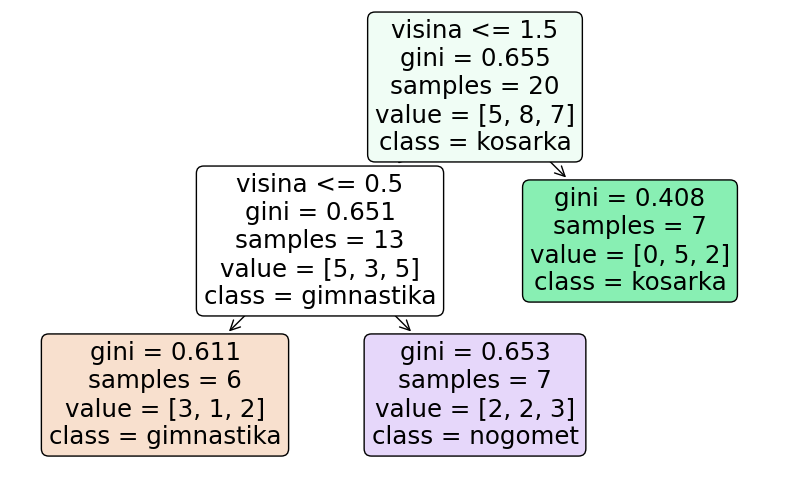

In [25]:
print(dict(enumerate(data["visina"].astype("category").cat.categories)))
plt.figure(figsize=(10, 6))
plot_tree(
    tree,
    feature_names=["visina"],
    class_names=data["sport"].astype("category").cat.categories,
    filled=True,
    rounded=True
)
plt.show()

Model lahko uporabimo za napovedovanje na novih primerih. Mark je še vedno srednje rasti (vrednost $1$).

We can use the model to make predictions on new cases. Mark is still of medium height (value $1$).

In [ ]:
mark = pd.DataFrame({"visina": [1]})
tree.predict(mark)

array([2], dtype=int8)

Sama številka nam ne pove veliko, zato jo pretvorimo v ime športa.

The number alone doesn’t tell us much, so we convert it back into the sport’s name.

In [ ]:
class_names = sport_cat.cat.categories
pred = tree.predict(mark) 
pred_label = class_names[pred]

pred_label

Index(['nogomet'], dtype='object')

Sedaj bomo na podatkih o Titaniku naučili odločitveno drevo. Uporabimo atribute `status`, `age` in `sex` za napoved `survived`. Po učenju si oglejmo izrisano drevo.

Now let’s train a decision tree on the Titanic dataset. Use the features `status`, `age`, and `sex` to predict `survived`. After training, visualize the resulting tree.

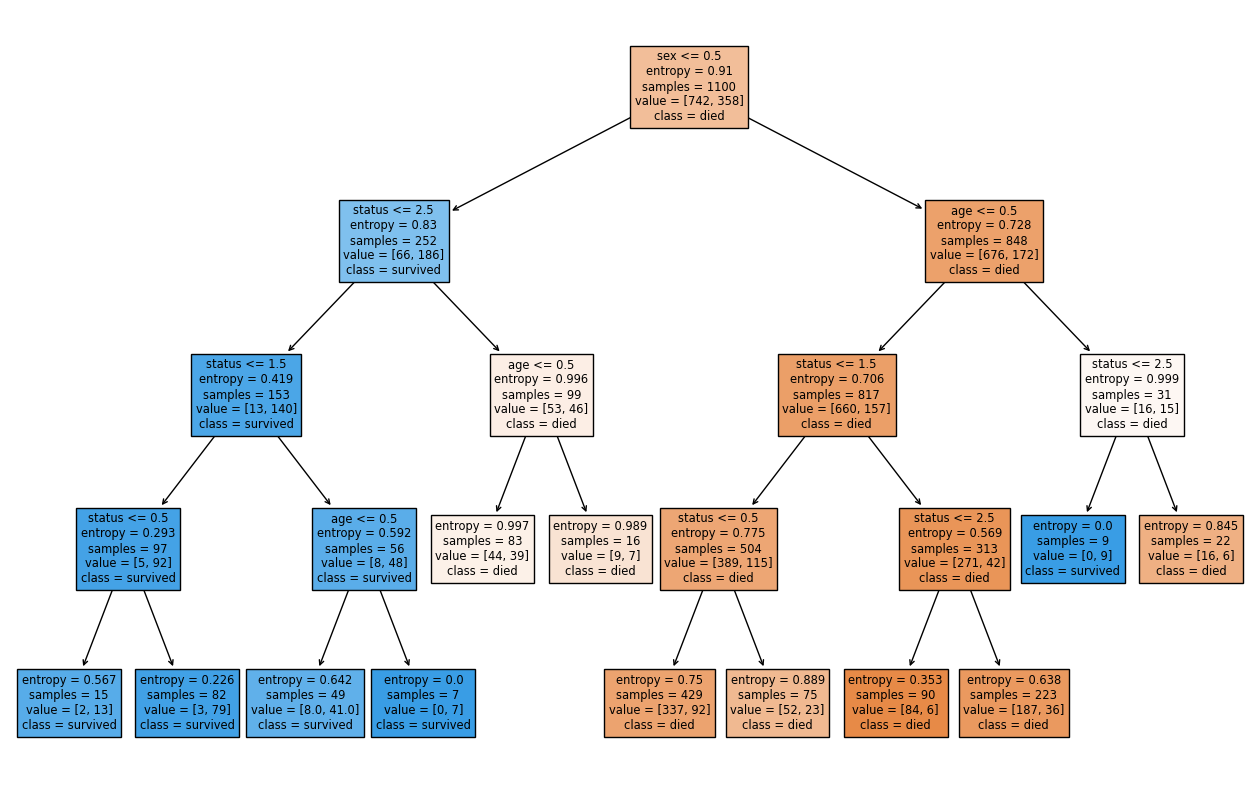

In [28]:
data = pd.read_table('../data/titanic-training.tab', skiprows=[1,2])
data["status"] = data["status"].astype("category").cat.codes
data["age"] = data["age"].astype("category").cat.codes   # child=1, adult=0
data["sex"] = data["sex"].astype("category").cat.codes   # male=1, female=0

X = data[["status", "age", "sex"]]
y = data["survived"]

tree = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,
    random_state=42
)
tree.fit(X, y)

plt.figure(figsize=(16, 10))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=["died", "survived"],
    filled=True,
)
plt.show()


### Vprašanje 7-1-2

Na testni množici ocenite uspešnost klasifikatorja.

### Question 7-1-2

Evaluate the performance of the classifier on the test set.

[Odgovor](207-1.ipynb#Odgovor-7-1-2)

[Answer](207-1.ipynb#Answer-7-1-2)

### Vprašanje 7-1-3

Poskusite različne [parametre](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) pri učenju modela. Kako se spreminja njegova uspešnost?

### Question 7-1-3

Try different [parameters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) when training the model. How does its performance change?

[Odgovor](207-1.ipynb#Odgovor-7-1-3)

[Answer](207-1.ipynb#Answer-7-1-3)